# Model Reproducibility



In [3]:
import sys
repo_path = '/Users/adhivp/Desktop/Ersilia_tasks' #enter your repo path here
sys.path.append(repo_path)
import pandas as pd
import numpy as np
import os
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data , cleaning it and saving as a file for modelhub

In [13]:
# In this codeblock I will load the predictions obtained from the original author's code implementation from the /data folder
table_S6_path = os.path.join(repo_path,'data/eos30gr/Table S6.xlsx')
table_S6 = pd.read_excel(table_S6_path,skiprows=1) # for removing the title
table_S6.head()



,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.996768,0.003232,0


In [14]:
# Standardising the smiles 
from src.smiles_processing import standardise_smiles
smiles_list = table_S6['Smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
table_S6['Standardised_smiles'] = standardised_smiles_list
table_S6.head()

[19:02:25] Can't kekulize mol.  Unkekulized atoms: 3 10
[24/03/24 19:02:25 standardiser.neutralise WARNING] zwitterion with more negative charges than quaternary positive centres detected
[19:02:28] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 7 9
[19:02:29] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 8 10


,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification,Standardised_smiles
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.996768,0.003232,0,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...


In [15]:
# Dropping everything other than Standardised_smiles, Inchikey for processing in models
columns_to_drop = ['DrugBank ID', 'Smiles', 'Name','Predicted classification','Predicted negative probability','Predicted positive probability']
table_S6 = table_S6.drop(columns=columns_to_drop)
table_S6.head()


,Standardised_smiles
0,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
1,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...
2,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...
3,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12
4,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...


In [16]:
# adding inchikey to the table
from src.convert_smiles import smiles_to_inchikey

inchkeys = []


for smiles in table_S6['Standardised_smiles']:
    smiles_str = str(smiles)
    
    if pd.notna(smiles_str):  
        inchkeys.append(smiles_to_inchikey(smiles_str))
    else:
        inchkeys.append(None) 

table_S6['Inchikey'] = inchkeys

table_S6.head()


[19:02:34] SMILES Parse Error: syntax error while parsing: nan
[19:02:34] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[19:02:34] SMILES Parse Error: syntax error while parsing: nan
[19:02:34] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[19:02:34] SMILES Parse Error: syntax error while parsing: nan
[19:02:34] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[19:02:34] SMILES Parse Error: syntax error while parsing: nan
[19:02:34] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[19:02:34] SMILES Parse Error: syntax error while parsing: nan
[19:02:34] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[19:02:34] SMILES Parse Error: syntax error while parsing: nan
[19:02:34] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[19:02:34] SMILES Parse Error: syntax error while parsing: nan
[19:02:34] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[19:02:34] SMILES Parse Err

,Standardised_smiles,Inchikey
0,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,LQBVNQSMGBZMKD-UHFFFAOYSA-N
1,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,OBMNJSNZOWALQB-NCQNOWPTSA-N
2,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,BVAZQCUMNICBAQ-PZHYSIFUSA-N
3,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,FGQFOYHRJSUHMR-UHFFFAOYSA-N
4,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,RDMOROXKXONCAL-UEKVPHQBSA-N


In [17]:

null_count = table_S6['Standardised_smiles'].isna().sum()

print("Number of rows with None or null values in the 'Inchikey' column:", null_count)



Number of rows with None or null values in the 'Inchikey' column: 96


- Adding 'CCCC' has Null value instead of dropping null value to preserve index of original table
- Adding Inchikey of 'CCCC'

In [18]:
filled_indices = []
table_S6['Standardised_smiles'].fillna('CCCC', inplace=True)
filled_indices.extend(table_S6[table_S6['Standardised_smiles'] == 'CCCC'].index.tolist())
table_S6['Inchikey'].fillna('IJDNQMDRQITEOD-UHFFFAOYSA-N', inplace=True)
filled_indices.extend(table_S6[table_S6['Standardised_smiles'] == 'CCCC'].index.tolist())

filled_indices = list(set(filled_indices))
print("Indices where null values were replaced:", filled_indices)
table_S6

Indices where null values were replaced: [1030, 9, 521, 523, 524, 13, 14, 527, 528, 1035, 531, 534, 25, 29, 30, 31, 1567, 33, 34, 35, 36, 37, 1576, 45, 46, 1070, 57, 59, 60, 64, 585, 1612, 1613, 592, 1624, 108, 110, 114, 115, 120, 121, 1148, 132, 133, 135, 136, 648, 651, 1678, 657, 148, 661, 155, 671, 161, 680, 1200, 189, 707, 1736, 1747, 757, 252, 257, 1793, 1804, 1808, 1809, 1301, 1816, 1306, 285, 811, 816, 1332, 1357, 1367, 344, 351, 361, 370, 371, 375, 399, 1423, 1429, 1438, 1439, 459, 461, 977, 466, 987, 998, 1001, 1013]


/var/folders/5p/9ynx53s97mg_tnk0937g0hmr0000gn/T/ipykernel_15396/3789716931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table_S6['Standardised_smiles'].fillna('CCCC', inplace=True)
/var/folders/5p/9ynx53s97mg_tnk0937g0hmr0000gn/T/ipykernel_15396/3789716931.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

,Standardised_smiles,Inchikey
0,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,LQBVNQSMGBZMKD-UHFFFAOYSA-N
1,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,OBMNJSNZOWALQB-NCQNOWPTSA-N
2,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,BVAZQCUMNICBAQ-PZHYSIFUSA-N
3,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,FGQFOYHRJSUHMR-UHFFFAOYSA-N
4,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,RDMOROXKXONCAL-UEKVPHQBSA-N
...,...,...
1819,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,PMATZTZNYRCHOR-IMVLJIQESA-N
1820,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,SBNPWPIBESPSIF-MHWMIDJBSA-N
1821,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,NFLWUMRGJYTJIN-NXBWRCJVSA-N
1822,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,BLCLNMBMMGCOAS-URPVMXJPSA-N


In [9]:
## Saving the file 
file_path = repo_path +'/data/eos30gr/table_S6_processed.csv'
table_S6.to_csv(file_path,index=False)

## Data trying to get reproduced

- I am trying to reproduce predictions from Table S6.xlsx 
- All the predicted values in Table S6 is above 50 percentage that is it's positive or considered as Hreg Blocker
- Here is the link of the same https://doi.org/10.1021/acs.jcim.8b00769
- Detailed predictions for 1,824 FDA-approved drugs by deephERG. (.xlsx)
- 1,824 predictions are there in which 96 where lost during processing, so total 1,728 left. 
- Out of 1,728 is considered 526 postive and rest 1202 is negative    

In [19]:

table_S6_path = os.path.join(repo_path,'data/eos30gr/Table S6.xlsx')
table_S6 = pd.read_excel(table_S6_path,skiprows=1) # for removing the title
table_S6

,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,1.653959e-01,0.834604,1
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,6.853388e-01,0.314661,0
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,1.486849e-01,0.851315,1
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,8.757238e-01,0.124276,0
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,9.967685e-01,0.003232,0
...,...,...,...,...,...,...
1819,DB00091,OC1=NC(CC)C(=O)N(CC(=O)N(C)C(CC(C)C)C(O)=NC(C(...,Cyclosporine,6.533487e-02,0.934665,1
1820,DB00050,Clc1ccc(cc1)C[C@@H](NC(=O)[C@H](NC(=O)C)Cc1cc2...,Cetrorelix,3.997791e-08,1.000000,1
1821,DB00035,S1SCCC(=O)N[C@@H](Cc2ccc(O)cc2)C(=O)N[C@@H](Cc...,Desmopressin,2.054156e-01,0.794584,1
1822,DB00014,Oc1ccc(cc1)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC...,Goserelin,5.643849e-05,0.999944,1


## Loading predictions made from modelhub, restoring the column names, according to the original table for comparision

In [20]:
table_S6_output_from_local_model_eos30gr_path = os.path.join(repo_path,'data/eos30gr/table_S6_eos30gr_output_google_collab.csv')
table_S6_predictions = pd.read_csv(table_S6_output_from_local_model_eos30gr_path) 
table_S6_predictions

,key,input,activity10
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040
...,...,...,...
1819,PMATZTZNYRCHOR-IMVLJIQESA-N,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,0.382343
1820,SBNPWPIBESPSIF-MHWMIDJBSA-N,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,0.516502
1821,NFLWUMRGJYTJIN-NXBWRCJVSA-N,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,0.481436
1822,BLCLNMBMMGCOAS-URPVMXJPSA-N,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.494578


In [21]:
# Adding the DrugBank ID,Name from previous table as per the order of indexes as it's the same even after predictions
table_S6_predictions = pd.merge(table_S6_predictions, table_S6[['DrugBank ID','Name']], left_index=True, right_index=True)
table_S6_predictions.head()


,key,input,activity10,DrugBank ID,Name
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,DB11581,Venetoclax
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,DB11575,Grazoprevir
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,DB11574,Elbasvir
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,DB11560,Lesinurad
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,DB11367,Cefroxadine


In [22]:
#dropping the null values which was previously replaced by "CCCC"
table_S6_predictions = table_S6_predictions[table_S6_predictions['input'] != 'CCCC']
table_S6_predictions

,key,input,activity10,DrugBank ID,Name
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,DB11581,Venetoclax
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,DB11575,Grazoprevir
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,DB11574,Elbasvir
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,DB11560,Lesinurad
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,DB11367,Cefroxadine
...,...,...,...,...,...
1819,PMATZTZNYRCHOR-IMVLJIQESA-N,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,0.382343,DB00091,Cyclosporine
1820,SBNPWPIBESPSIF-MHWMIDJBSA-N,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,0.516502,DB00050,Cetrorelix
1821,NFLWUMRGJYTJIN-NXBWRCJVSA-N,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,0.481436,DB00035,Desmopressin
1822,BLCLNMBMMGCOAS-URPVMXJPSA-N,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.494578,DB00014,Goserelin


In [23]:
# Dropping inch key , renaming activity10 , renaming input 
table_S6_predictions.drop(columns='key',inplace=True)
table_S6_predictions.rename(columns={'activity10':'Predicted_positive_probability','input':'smiles'},inplace=True)
table_S6_predictions.head()

,smiles,Predicted_positive_probability,DrugBank ID,Name
0,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,DB11581,Venetoclax
1,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,DB11575,Grazoprevir
2,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,DB11574,Elbasvir
3,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,DB11560,Lesinurad
4,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,DB11367,Cefroxadine


In [24]:
#rearanging columns
desired_columns_order = ['DrugBank ID','Name','smiles','Predicted_positive_probability']
table_S6_predictions = table_S6_predictions[desired_columns_order]
table_S6_predictions.head()

,DrugBank ID,Name,smiles,Predicted_positive_probability
0,DB11581,Venetoclax,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,DB11575,Grazoprevir,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637
2,DB11574,Elbasvir,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485
3,DB11560,Lesinurad,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208
4,DB11367,Cefroxadine,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040


In [25]:
## Adding negative probability by subracting 1 from Predicted_positive_probability
table_S6_predictions['Predicted_negative_probability'] = 1- table_S6_predictions['Predicted_positive_probability']
table_S6_predictions.head()

/var/folders/5p/9ynx53s97mg_tnk0937g0hmr0000gn/T/ipykernel_15396/674848098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_S6_predictions['Predicted_negative_probability'] = 1- table_S6_predictions['Predicted_positive_probability']


,DrugBank ID,Name,smiles,Predicted_positive_probability,Predicted_negative_probability
0,DB11581,Venetoclax,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406
1,DB11575,Grazoprevir,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,0.630363
2,DB11574,Elbasvir,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,0.648515
3,DB11560,Lesinurad,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,0.670792
4,DB11367,Cefroxadine,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,0.878960


## Comparing result and original data

- Downsampled to a factor of 20 , to make the graph more visible


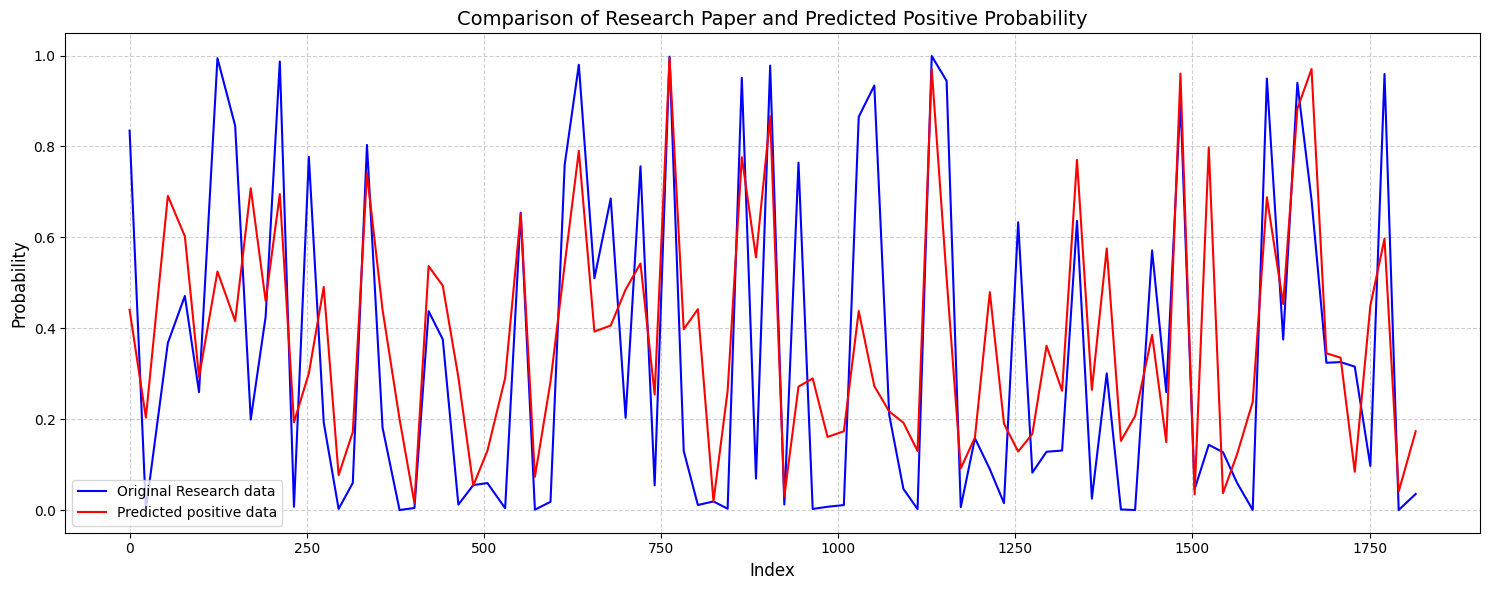

In [26]:
table_S6_cleaned = table_S6.drop(filled_indices)

downsample_factor = 20  
table_S6_cleaned_downsampled = table_S6_cleaned.iloc[::downsample_factor]
table_S6_predictions_downsampled = table_S6_predictions.iloc[::downsample_factor]

plt.figure(figsize=(15, 6))

plt.plot(table_S6_cleaned_downsampled.index, table_S6_cleaned_downsampled['Predicted positive probability'], color='blue', label='Original Research data')

plt.plot(table_S6_predictions_downsampled.index, table_S6_predictions_downsampled['Predicted_positive_probability'], color='red', label='Predicted positive data')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Comparison of Research Paper and Predicted Positive Probability', fontsize=14)

plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

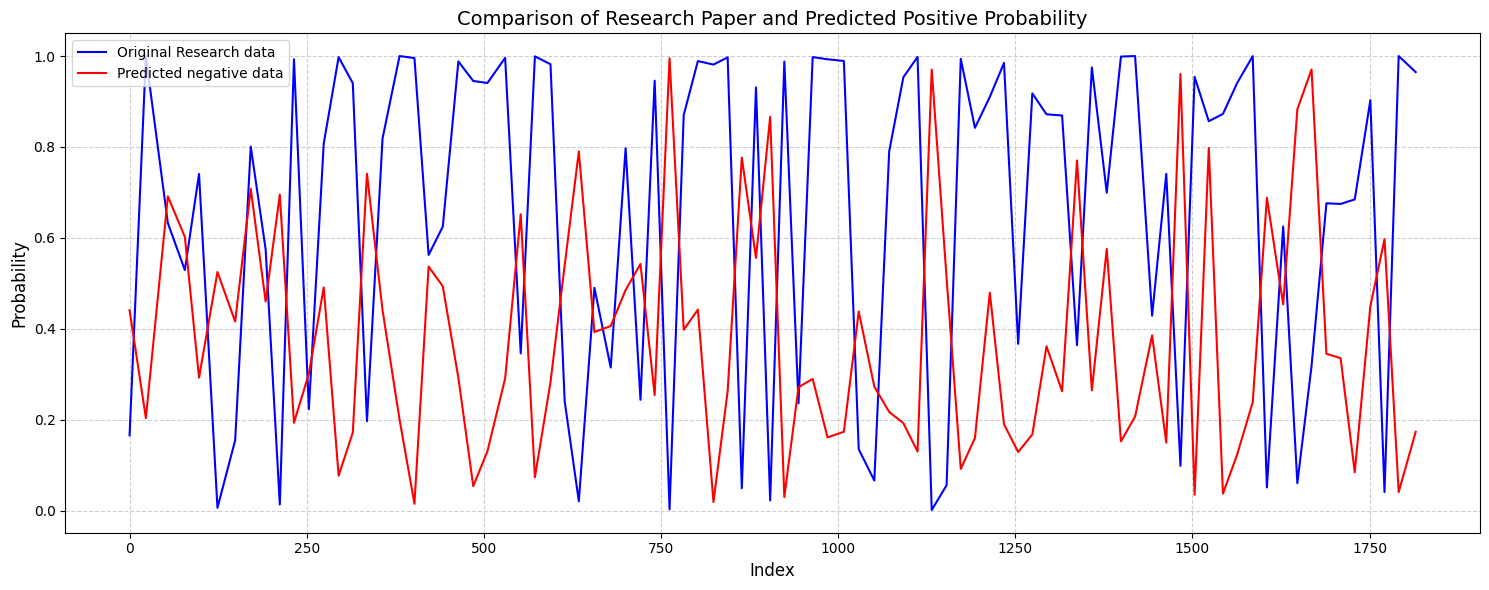

In [27]:
plt.figure(figsize=(15, 6))

plt.plot(table_S6_cleaned_downsampled.index, table_S6_cleaned_downsampled['Predicted negative probability'], color='blue', label='Original Research data')

plt.plot(table_S6_predictions_downsampled.index, table_S6_predictions_downsampled['Predicted_positive_probability'], color='red', label='Predicted negative data')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Comparison of Research Paper and Predicted Positive Probability', fontsize=14)

plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Comparision based on wether there are considered blocker or non-blocker (greater than 0.5 probability)

In [28]:
num_values_above_0_5 = (table_S6_predictions['Predicted_positive_probability'] > 0.5).sum()

# Print the number of values above 0.5
print("Number of values above 0.5:", num_values_above_0_5)

Number of values above 0.5: 410


In [42]:
molecules_both_matching = set(table_S6[table_S6['Predicted positive probability'] > 0.5]['Name']).intersection(set(table_S6_predictions[table_S6_predictions['Predicted_positive_probability'] > 0.5]['Name']))

molecules_first_only = set(table_S6[table_S6['Predicted positive probability'] > 0.5]['Name']).difference(set(table_S6_predictions[table_S6_predictions['Predicted_positive_probability'] > 0.5]['Name']))

molecules_second_only = set(table_S6_predictions[table_S6_predictions['Predicted_positive_probability'] > 0.5]['Name']).difference(set(table_S6[table_S6['Predicted positive probability'] > 0.5]['Name']))

df_both_matching = pd.DataFrame({"Category": "Molecules above 0.5 in both datasets (matching)", "Molecule": list(molecules_both_matching)})
df_first_only = pd.DataFrame({"Category": "Molecules above 0.5 in the Original Table S6 only", "Molecule": list(molecules_first_only)})
df_second_only = pd.DataFrame({"Category": "Molecules above 0.5 in the Predicted Table S6 only", "Molecule": list(molecules_second_only)})

result_df = pd.concat([df_both_matching, df_first_only, df_second_only], ignore_index=True)

result_df

,Category,Molecule
0,Molecules above 0.5 in both datasets (matching),Sonidegib
1,Molecules above 0.5 in both datasets (matching),Nonoxynol-9
2,Molecules above 0.5 in both datasets (matching),Pipazethate
3,Molecules above 0.5 in both datasets (matching),Isothipendyl
4,Molecules above 0.5 in both datasets (matching),Penbutolol
...,...,...
620,Molecules above 0.5 in the Predicted Table S6 ...,Phenylbutazone
621,Molecules above 0.5 in the Predicted Table S6 ...,Mazindol
622,Molecules above 0.5 in the Predicted Table S6 ...,Propylhexedrine
623,Molecules above 0.5 in the Predicted Table S6 ...,Dabigatran etexilate


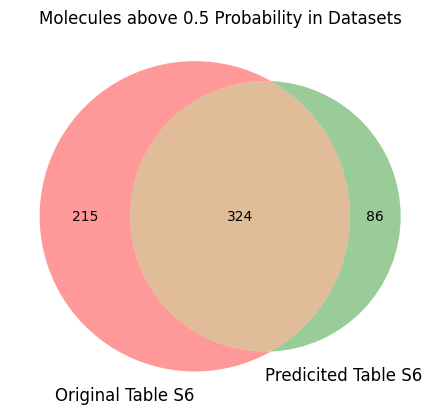

In [43]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

venn_labels = ('Original Table S6', 'Predicited Table S6')

venn2(subsets=(len(molecules_first_only), len(molecules_second_only), len(molecules_both_matching)),
      set_labels=venn_labels)

plt.title('Molecules above 0.5 Probability in Datasets')
plt.show()


## Conclusion

- Values predicted doesn't match with values in the research paper
- Values are entirely different from the paper the graph can be seen above
- Considering a treshold greater than 0.5, 410 molecules have shown as a blocker and 1318 as non-blocker
- In the original research paper Out of 1,728 is considered 526 postive and rest 1202 is negative 
- 324 molecules match as blocker in both datasets
- So probability values were not being able to reproduce
- 410 molecules are considered as blocker (324 is the real number as it gave many false positive)